# Image filters

First, we again input the modules you already know.

In [1]:
# the basics
from skimage.io import imread
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import os
# for inline plotting and fun with dynamic plots
%matplotlib inline
from ipywidgets import interact, interactive, fixed

Let's add some more modules. Note: It is considered good practice to only import the modules/functions you need. Alternatively, you could also import all scikit-image filters with `from skimage import filters` and use them like this `filters.gaussian()` if you for instance want to call the gaussian filter.

In [2]:
# filters to enhance or attenuate image details
from skimage.filters import gaussian, median, sobel, threshold_otsu 
# a classic filter to detect edges
from skimage.feature import canny
# a structure element
from skimage.morphology import disk

Let's again find some image files and extract one channel from the first image in the list.

## 1. Read in an image

This is just a recap from exercise 1. 

In [3]:
image_files = sorted(glob('../sample_data/*.tiff'))
image = imread(image_files[0])
channel_0 = image[:,:,0]

Let's first check the data. Here we use the pyplot subplot method to first make an axis object, then use it to show the image.

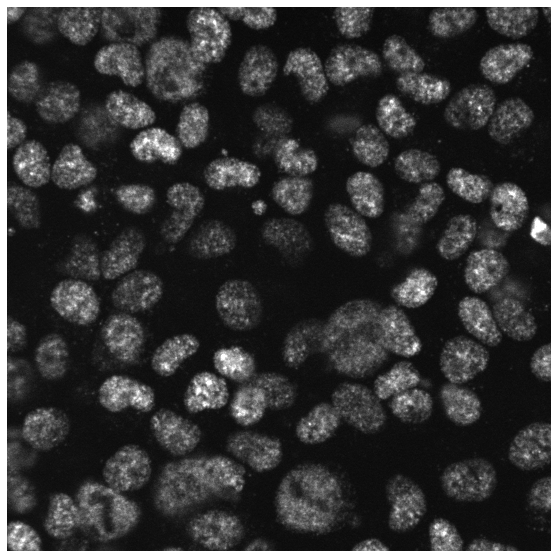

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(channel_0,cmap='gray',vmin=300,vmax=4000)
ax.axis('off')
plt.show()

## 2. The Gaussian filter

Filters are useful, especially in pre-processing, for various image analysis tasks. They are typically used to either suppress or correct noise, and enhance features in images so downstream algorithms have it easier.

The gaussian filter is a classical filter to remove noise. A gaussian ***kernel*** is applied to the image which is defined by $\sigma$. Remember the Gaussian function:

$g(x) = \frac{1}{\sigma\sqrt{2\pi}}exp^{-\frac{1}{2} \frac{(x-\mu)^{2}}{\sigma^{2}}}$

Let's quickly plot Gaussians with different sigmas.

In [5]:
import math

In [6]:
def g(x,mu=0,s=1.0):
    return((1/(s*math.sqrt(2*math.pi))) * (np.exp(-1/2 * (((x - mu)**2)/s**2))))

In [7]:
# a numpy array linearly spaced from -5 to 5
x = np.linspace(-5,5,100)
# to calculate the gaussian we can use our function
y = g(x)

In [8]:
# just set up different colors for plotting
colors = ['-r','-b','-g']
# plot different variances
sigmas_sq = [0.2, 1.0, 5.0]

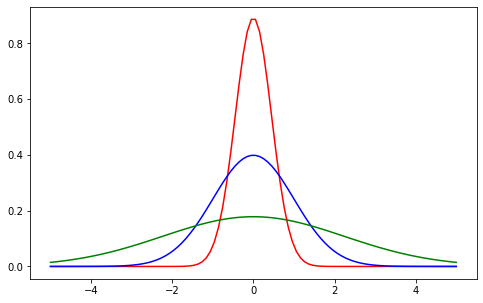

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
for color, sigma in zip(colors, sigmas_sq):
    ax.plot(x,g(x, s=math.sqrt(sigma)),color)

To apply a Gaussian function in 2 dimensions to a whole image, we can use the filter `gaussian` of scikit-image.

In [10]:
Gauss = gaussian(channel_0, sigma=5)

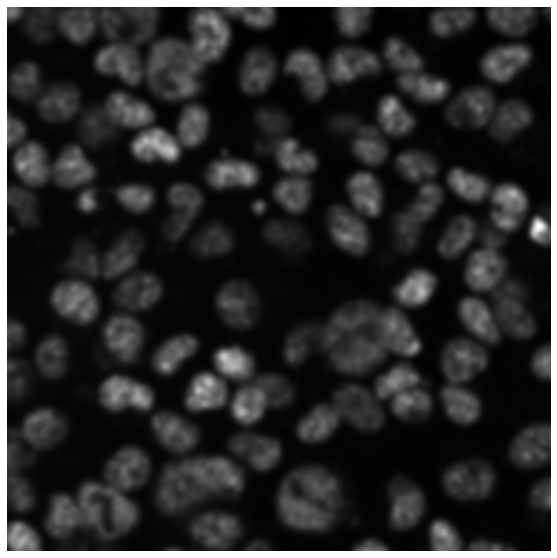

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(Gauss,cmap='gray')
ax.axis('off')
plt.show()

Explore how larger sigmas increase the 'blur' in the image.

In [12]:
def interactive_plot(img, s=5.0):
    Gauss = gaussian(img, sigma=s)
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(Gauss, cmap='gray')
    ax.axis('off')
    plt.show()
    
p = interactive(interactive_plot, {'manual': 'true'}, s=(0,50,0.1), img=fixed(channel_0))
p

interactive(children=(FloatSlider(value=5.0, description='s', max=50.0), Button(description='Run Interact', st…

Understand what else the gaussian filter of scikit-image is doing.

In [13]:
Gauss

array([[0.03096766, 0.03088787, 0.03082082, ..., 0.02027326, 0.02096714,
        0.02159645],
       [0.03104394, 0.03102432, 0.03101902, ..., 0.02016253, 0.02077993,
        0.02133838],
       [0.03116695, 0.03121306, 0.031275  , ..., 0.02000328, 0.02053467,
        0.02101368],
       ...,
       [0.01330422, 0.01408582, 0.01499911, ..., 0.00809801, 0.00810089,
        0.00809782],
       [0.01263822, 0.01336372, 0.0142173 , ..., 0.00812719, 0.00813327,
        0.00813284],
       [0.0120514 , 0.01272621, 0.01352515, ..., 0.00815489, 0.00816415,
        0.00816633]])

All values got ***normalized***! Normally, this will not matter for most image processing applications; but if you want to suppress this behavior, you can use `gaussian(preserve_range=True)`. This will aim to keep the intensity range in the image as in the original.

## 3. Other filters

There are many filters which can be used to enhance or suppress certain image features. Let's quickly try again the gaussian, a median filter and the sobel filter. You can find details about these filters in the scikit-image documentation:
  * [Gaussian](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)
  * [Median](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median)
  * [Sobel](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)

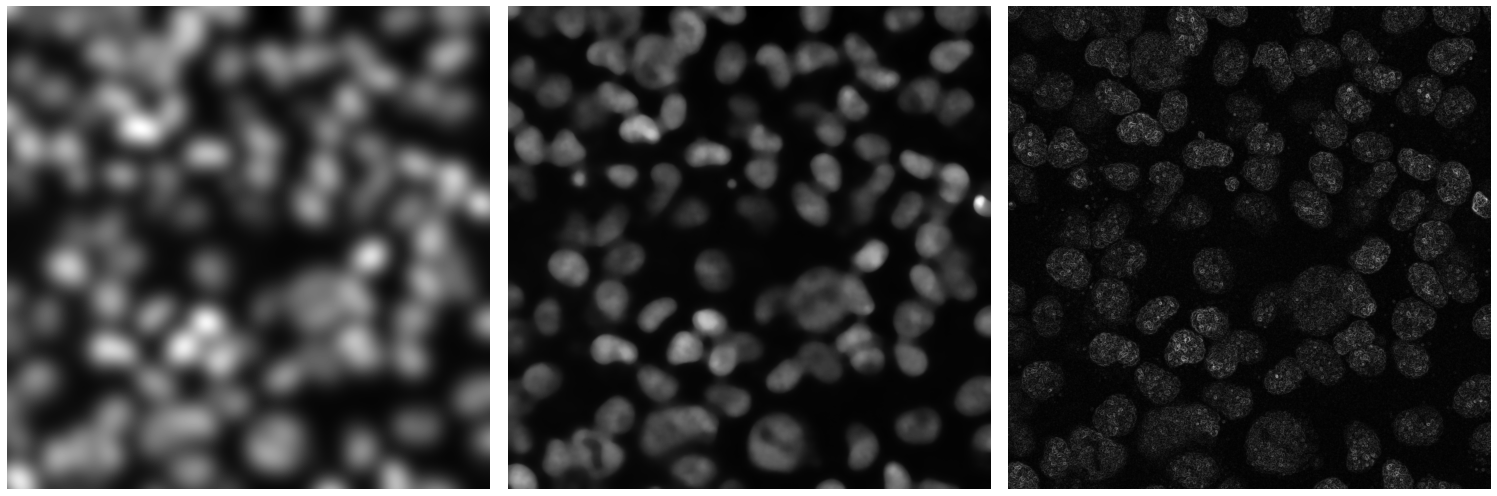

In [14]:
test_filters = [gaussian, median, sobel]
parameters = [20.0, disk(15), None ]
fig, ax = plt.subplots(1,len(test_filters),figsize=(len(test_filters)*7, 7))
i=0
for test_filter, parameter in zip(test_filters, parameters):
    filtered = test_filter(channel_0, parameter)
    ax[i].imshow(filtered, cmap='gray')
    ax[i].axis('off')
    i=i+1
plt.tight_layout()

## 4. Canny edge detector

A classic filter is the [Canny](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny) edge detector, which is actually already a combination of several image processing steps:
  * Apply a Gaussian with `sigma` width.
  * Apply Sobel filter in X and Y directions.
  * Thin the edge candidates derived from Sobel filters.
  * Hysteresis thresholding: label all points over a `high threshold` as edges, then connect all points over a `low threshold`.

Let's use the DNA channel and try the Canny.

In [15]:
channel_1 = image[:,:,1]

(-0.5, 1023.5, 1023.5, -0.5)

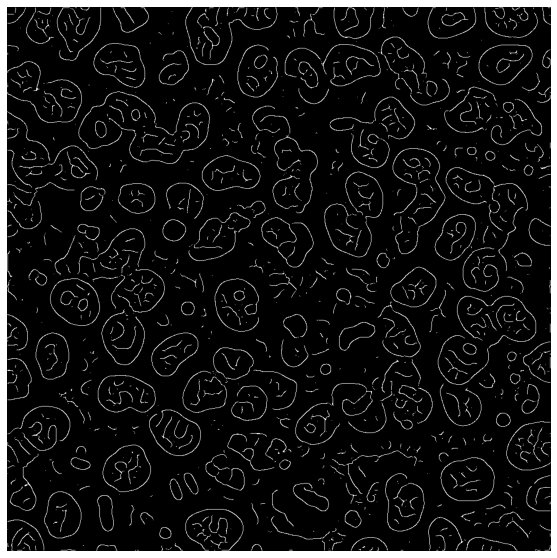

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
edges = canny(channel_1, sigma=7, low_threshold=0.2, high_threshold=1.0)
ax.imshow(edges, cmap='gray')
ax.axis('off')

This image looks much different from the raw data. In fact, is an entirely different data type.

In [17]:
edges.dtype

dtype('bool')

`bool` means that this is a boolean array, with only `True` and `False` values. The edges are indicated as `True` and the background will be `False`. This is a useful data type to then perform ***segmentation***.

## 5. Thresholding

Similar as the Canny filter above, this class of filters generates images of a different data type and is typically used as prerequisite to perform ***segmentation*** later. The goal is to define what is an object, or classes of objects *versus* background.

Let's look at a very classical thresholding approach developed by Otsu who described this method in his [1979 paper](https://ieeexplore.ieee.org/document/4310076). On [Wikipedia](https://en.wikipedia.org/wiki/Otsu%27s_method), there is a good description how this method works. The algorithm exahaustively searches the threshold that **minimizes intra**-class variance and **maximizes inter**-class variance. This means that the algorithm calculates all possible values for the whole histogram and picks the best value.

Let's have a look at the image histogram of the DNA channel.

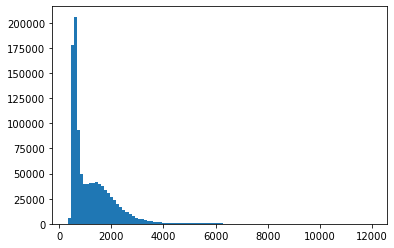

In [18]:
_ = plt.hist(np.ravel(channel_1), bins=100)

Let's see what Otsu would pick. We've already imported the `threshold_otsu` from `skimage.filters`.

In [19]:
threshold_otsu(channel_1)

1587

So this would be the value that the algorithm finds optimal to split our (image) data. Let's draw it in the histogram.

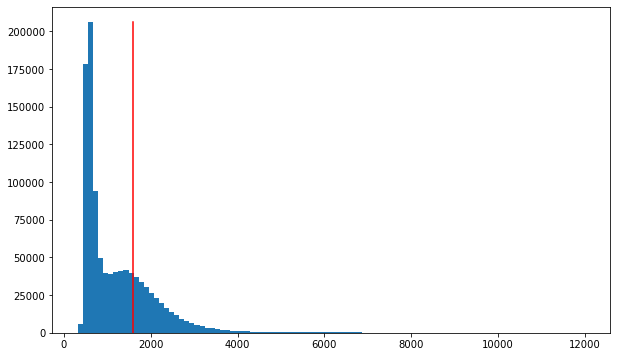

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
y,x,_ = ax.hist(np.ravel(channel_1), bins=100)
ax.plot([threshold_otsu(channel_1)]*2,[0,max(y)],'-r')

How to use this in image processing? We can make a boolean array out of our raw image very easily, using the Otsu threshold as condition.

In [21]:
Thresholded = channel_1 > threshold_otsu(channel_1)

(-0.5, 1023.5, 1023.5, -0.5)

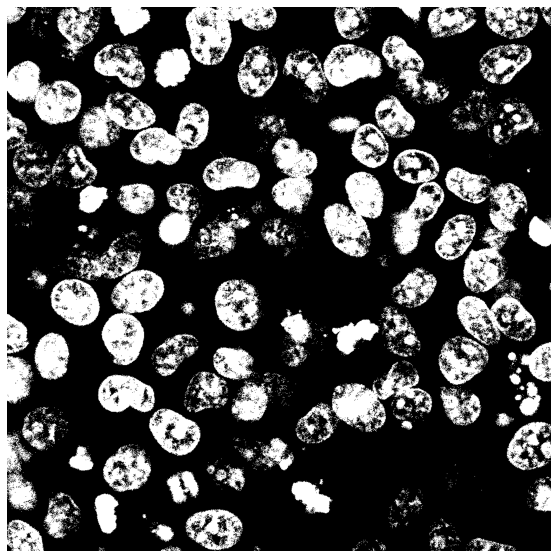

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(Thresholded, cmap='gray')
ax.axis('off')

This starts already looking good! The nuclei of the DNA channel appear as foreground. However, you can see that we still get some small objects that are not cells and that the noise in the image leads to cells being not completely filled. We will next try to get better results by pre-processing the image with a Gaussian filter and perform some ***Morphological filters*** after applying a threshold.